# Análise de Sentimentos + Demo de Busca com Twitter

In [5]:
#!pip install tweepy

In [6]:
import tweepy
from tweepy import OAuthHandler
def load_api():
    ''' Function that loads the twitter API after authorizing the user. '''
    CONSUMER_KEY = '7Q5yEwrYLAUkYLXna0ZGTfefD'
    CONSUMER_SECRET = '5A1xx6c0wvIqZFgF6kn0bPAfPo7ERhXgAslBJeKZ66JPVY10uc'
    OAUTH_TOKEN = '2904474861-SuqqjBrphTNAI1rGHAecrQf5wT4ByauhEKjPdXC'
    OAUTH_TOKEN_SECRET = 'YKXb7UjHUiLAZ04r6KOTjm9s6lrx7GZcRGA9fqJTPxMHw'
    
    
    consumer_key = CONSUMER_KEY
    consumer_secret = CONSUMER_SECRET
    access_token = OAUTH_TOKEN
    access_secret = OAUTH_TOKEN_SECRET
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    # load the twitter API via tweepy
    return tweepy.API(auth)

In [7]:
def tweet_search(api, query, max_tweets): #, max_id, since_id, geocode):
    ''' Function that takes in a search string 'query', the maximum
        number of tweets 'max_tweets', and the minimum (i.e., starting)
        tweet id. It returns a list of tweepy.models.Status objects. '''

    searched_tweets = []
    while len(searched_tweets) < max_tweets:
        remaining_tweets = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query, count=remaining_tweets )#,
                                    #since_id=str(since_id), max_id=str(max_id-1))
#                                    geocode=geocode)
            print('found',len(new_tweets),'tweets of ', query)
            if not new_tweets:
                print('no tweets found')
                break
            searched_tweets.extend(new_tweets)
            max_id = new_tweets[-1].id
        except tweepy.TweepError:
            print('exception raised, waiting 15 minutes')
            print('(until:', dt.datetime.now()+dt.timedelta(minutes=15), ')')
            time.sleep(15*60)
            break # stop the loop  
    return searched_tweets, max_id

In [8]:
def convert_structure_to_tweet(tweets):
    tweets_only_text = []
    for tweet in tweets:
        tweets_only_text.append(tweet._json['text'])
    return tweets_only_text

## Twitter - Busca por Termos

In [9]:
query = "artificial inteligence"

# Twitter

In [10]:
twitter_api = load_api()
tweets, max_id = tweet_search(twitter_api, query, max_tweets=500)
tweets_text = convert_structure_to_tweet(tweets)

found 79 tweets of  artificial inteligence
found 79 tweets of  artificial inteligence
found 79 tweets of  artificial inteligence
found 79 tweets of  artificial inteligence
found 79 tweets of  artificial inteligence
found 79 tweets of  artificial inteligence
found 26 tweets of  artificial inteligence


In [13]:
tweets_text[:5]

['RT @BlerinaGuga: Lab 1- Artificial Inteligence and Information @WFDemocracy a wow panel adressing issues of bits, AI gates and freedom. Dig…',
 'Lab 1- Artificial Inteligence and Information @WFDemocracy a wow panel adressing issues of bits, AI gates and freed… https://t.co/icHwKYvRUJ',
 'RT @LukmanAJabar: Beberapa hari lalu nonton Terminator Dark Fate, dan sekarang jadi muhasabah bgt tentang teknologi yg makin gila, khususny…',
 'Elon Musk on Artificial Inteligence https://t.co/XBBaQmZceA via @YouTube a good 👀',
 'Beberapa hari lalu nonton Terminator Dark Fate, dan sekarang jadi muhasabah bgt tentang teknologi yg makin gila, kh… https://t.co/XaPgNjJAOr']

In [36]:
resultt = query[0] 
r = resultt._json
r["created_at"]

'Thu Nov 07 10:36:42 +0000 2019'

In [45]:
query.

'sarampo'

In [46]:
%%time
query = twitter_api.search(q = "sarampo", result_type='recent', lang='pt', count=200)

for result_tweet in query:
    result = result_tweet._json
    print ("(%s) @%s %s" % (result["created_at"], result["user"]["screen_name"], result["text"]))

(Thu Nov 07 10:45:22 +0000 2019) @Rodrigo_F_JvL RT @prefeitura_jlle: URGENTE: o sarampo é uma doença altamente contagiosa. Se você ainda não se vacinou, procure uma Unidade de Saúde próxi…
(Thu Nov 07 10:42:22 +0000 2019) @CBNDiario Assembleia aprova projetos de lei para ampliar a fiscalização da vacinação contra o sarampo em SC | NSC Total https://t.co/OURyFxXzPB
(Thu Nov 07 10:36:42 +0000 2019) @vctr_j01 RT @AlexandrePerger: Joinville tem 200 casos suspeitos de sarampo e 14 confirmados. Vocês fazem ideia fo que é isso? Uma doença que tava er…
(Thu Nov 07 10:36:38 +0000 2019) @altamir_oliv Irati tem mais dois casos suspeitos de sarampo | Rádio Najuá - SUPER 92.5/ FM 106.9 | Irati - Paraná https://t.co/o60i4IpADj
(Thu Nov 07 10:34:40 +0000 2019) @afelisd galera q vai no baile amanhã, tomem vacina contra sarampo antes de irem kkkkkkk 👍🏼👍🏼👍🏼👍🏼
(Thu Nov 07 10:26:48 +0000 2019) @Rose_Graca O sarampo continua matando, assim como a ignorância, afinal muitos pensam que não vale à pena vacinar

In [48]:
%%time

query = twitter_api.search(q = "china", result_type='recent', lang='pt', count=50)
for result_tweet in query:
    result = result_tweet._json
    print ("(%s) @%s %s" % (result["created_at"], result["user"]["screen_name"], result["text"]))

(Thu Nov 07 10:48:55 +0000 2019) @banida_e RT @PatoCorporation: O filho do maior contrabandista do Brasil, Lao Kin Chon, estava na comitiva do presidente Bolsonaro na China.

Mas seg…
(Thu Nov 07 10:48:53 +0000 2019) @MelilaNoleto RT @CBF_Futebol: Com a vitória por 4 a 0 sobre o Canadá, o Brasil já está na final do Torneio Internacional da China. As #GuerreirasDoBrasi…
(Thu Nov 07 10:48:50 +0000 2019) @editorwu No governo Bolsonaro, estatais da China comunista levam o pré-sal com a Petrobras https://t.co/JR2XbiXOdn via @CartaCampinas
(Thu Nov 07 10:48:42 +0000 2019) @maylasoares1 RT @Brasil_Uswnt: *lógica da cbf*
-vamos fazer um torneio amistoso na China?
-vai ter transmissão?
-não
-faz assim msm
(Thu Nov 07 10:48:31 +0000 2019) @AtualNoticia China diz que concordou com os EUA em cancelar tarifas em fases https://t.co/uSvhke3QW6
(Thu Nov 07 10:48:30 +0000 2019) @ma_rxista RT @MarcioPochmann: Governo Bolsonaro, de extrema direita, entrega parte do pré-sal para empresas da China, governa

# Análise de Sentimentos

## Polaridades (Positiva, Negativa, Neutra)

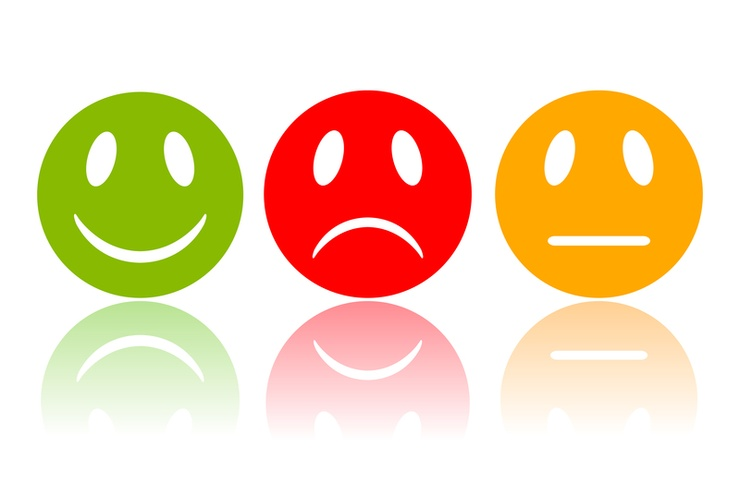

In [49]:
from IPython.display import Image
Image(filename='Sentiment-Analysis.jpg')

## Uso do textblob para analise de sentimentos - Polaridade

In [52]:
#!pip install textblob

In [53]:
from textblob import TextBlob
def analize_sentiments(tweets):
    tweets_sentiments = []
    pos = neg = neutral = 0
    for tweet in tweets:
        # Create a list with all the terms
        blob = TextBlob(tweet)
        polarity = blob.sentiment.polarity
        #print blob.sentiment.subjectivity
        #print (os.listdir(tweet["text"]))
        if polarity < 0:
            sentiment = "negative"
            neg+=1
        elif polarity == 0:
            sentiment = "neutral"
            neutral+=1
        else:
            sentiment = "positive"
            pos+=1

        tweets_sentiments.append([sentiment, polarity, tweet] )
        
    return tweets_sentiments, pos, neg, neutral    

In [54]:
import pandas as pd
def analyse_tweets_query(queries, max_tweets):
    
    df = pd.DataFrame(columns=["Query","Positive", "Negative", "Neutral"  ], index=range(len(queries)))
    i = 0
    twitter_api = load_api()
    for query in queries:       
        tweets, max_id = tweet_search(twitter_api, query, max_tweets)
        tweets_text = convert_structure_to_tweet(tweets)
        tweets_sentiments, pos, neg, neutral = analize_sentiments(tweets_text)
        total = pos + neg + neutral
        #print ("Sentiment Analysis Twitter")
        #print ("Query: ", query)
        #print ("Positive: {0:.0f} % ".format(pos/total * 100) )
        #print ("Negative: {0:.0f} % ".format(neg/total * 100) )
        #print ("Neutral: {0:.0f} % ".format(neutral/total * 100) )
        
        df.loc[i].Query = query              
        df.loc[i].Positive = pos/total * 100
        df.loc[i].Negative = neg/total * 100
        df.loc[i].Neutral = neutral/total * 100
                      
        #df.loc[i]["Query"] = query
        #df.loc[i]["Positive"] = pos/total * 100
        #df.loc[i]["Negative"] = neg/total * 100
        #df.loc[i]["Neutral"] = neutral/total * 100
        i += 1
    return df

In [56]:
%%time
queries = ["supremo", "leilão",  "pré-sal", "Paulo Guedes"] # , "Michael Phelps"]
df2 = analyse_tweets_query(queries,   max_tweets = 500)
print
print ("-------------------------------------------------")
print ("Tweets Sentiment Analysis (%)")
df2

found 100 tweets of  supremo
found 100 tweets of  supremo
found 100 tweets of  supremo
found 100 tweets of  supremo
found 100 tweets of  supremo
found 100 tweets of  leilão
found 100 tweets of  leilão
found 100 tweets of  leilão
found 100 tweets of  leilão
found 100 tweets of  leilão
found 100 tweets of  pré-sal
found 100 tweets of  pré-sal
found 100 tweets of  pré-sal
found 100 tweets of  pré-sal
found 100 tweets of  pré-sal
found 100 tweets of  Paulo Guedes
found 100 tweets of  Paulo Guedes
found 100 tweets of  Paulo Guedes
found 100 tweets of  Paulo Guedes
found 100 tweets of  Paulo Guedes
-------------------------------------------------
Tweets Sentiment Analysis (%)
CPU times: user 3.84 s, sys: 327 ms, total: 4.17 s
Wall time: 38.4 s


,Query,Positive,Negative,Neutral
0,supremo,18,0,82
1,leilão,14,1,85
2,pré-sal,26,0,74
3,Paulo Guedes,32.4,0,67.6


In [57]:
queries = ["coke", "pepsi"  ]
df2 = analyse_tweets_query(queries,   max_tweets = 500)
print
print ("-------------------------------------------------")
print ("Tweets Sentiment Analysis (%)")
df2

found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  pepsi
found 100 tweets of  pepsi
found 100 tweets of  pepsi
found 100 tweets of  pepsi
found 100 tweets of  pepsi
-------------------------------------------------
Tweets Sentiment Analysis (%)


,Query,Positive,Negative,Neutral
0,coke,4.8,5,90.2
1,pepsi,19,6,75


In [58]:
import time

queries = ["Lula", "Michel Temer", "Moro", "Gilmar Mendes"  ]
df2 = analyse_tweets_query(queries,   max_tweets = 700)
print
print ("-------------------------------------------------")
print ("Tweets Sentiment Analysis (%)")
print (time.ctime())
df2

found 100 tweets of  Lula
found 100 tweets of  Lula
found 100 tweets of  Lula
found 100 tweets of  Lula
found 100 tweets of  Lula
found 100 tweets of  Lula
found 100 tweets of  Lula
found 100 tweets of  Michel Temer
found 100 tweets of  Michel Temer
found 100 tweets of  Michel Temer
found 100 tweets of  Michel Temer
found 100 tweets of  Michel Temer
found 100 tweets of  Michel Temer
found 100 tweets of  Michel Temer
found 100 tweets of  Moro
found 100 tweets of  Moro
found 100 tweets of  Moro
found 100 tweets of  Moro
found 100 tweets of  Moro
found 100 tweets of  Moro
found 100 tweets of  Moro
found 100 tweets of  Gilmar Mendes
found 100 tweets of  Gilmar Mendes
found 100 tweets of  Gilmar Mendes
found 100 tweets of  Gilmar Mendes
found 100 tweets of  Gilmar Mendes
found 100 tweets of  Gilmar Mendes
found 100 tweets of  Gilmar Mendes
-------------------------------------------------
Tweets Sentiment Analysis (%)
Thu Nov  7 08:15:28 2019


,Query,Positive,Negative,Neutral
0,Lula,6.57143,4,89.4286
1,Michel Temer,7,1,92
2,Moro,10,7,83
3,Gilmar Mendes,1,0,99


In [59]:
dict = {'idade': 30,
         'Nomes': ["Vladimir", "UEPB"]
       }

In [60]:
dict

{'idade': 30, 'Nomes': ['Vladimir', 'UEPB']}

In [61]:
dict['idade']

30

In [62]:
dict['Nomes'][1]

'UEPB'

In [63]:
lst = [x**2 for x in range(20)]

In [64]:
lst

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361]

In [65]:
import pandas as pd
df = pd.DataFrame(columns=["Nome", "Idade"], data=[ ("Vladimir", 40) ,("Eleonilia", 23) ])
df.loc[2] = ["Pedro",  30]
df

,Nome,Idade
0,Vladimir,40
1,Eleonilia,23
2,Pedro,30
